Imports

In [1]:
# to get 3d plot to be rotatable (optional)
%matplotlib widget

In [2]:
import numpy as np
import umap
from matplotlib import pyplot as plt
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

Generating hidden states, inputs, reservoir states

In [3]:
# set parameters
sequence_length = 200
reservoir_size = 1

In [4]:
# generate hidden states and inputs
distribution = distribution_generator(num_states=6, num_outputs=2)
sigma, x = e_machine(states=["A", "B", "C", "D", "E", "F"], transition_matrix=distribution, n=sequence_length)

# initialize weights
W, v = weight_initialization(n=reservoir_size)

# initialize hidden state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [5]:
print(distribution)

[[0.09866855 0.08257533 0.1983349  0.01010961 0.2286219  0.17179591
  0.03625086 0.06808047 0.00534966 0.0265539  0.06776096 0.00589794]
 [0.09895614 0.18183479 0.22547997 0.03979135 0.07723118 0.00145701
  0.05669472 0.11587607 0.01026381 0.03905714 0.05110769 0.10225012]
 [0.02531823 0.11793964 0.07139032 0.04172354 0.07796087 0.07573423
  0.08646198 0.14244632 0.06338862 0.084793   0.10539226 0.107451  ]
 [0.2090936  0.05315384 0.00499697 0.02694279 0.10881827 0.18256829
  0.11590776 0.06525126 0.00855107 0.01975617 0.12064154 0.08431845]
 [0.22632004 0.04472698 0.00634217 0.13981063 0.15291775 0.00456695
  0.02964905 0.10481245 0.024898   0.02141218 0.02603225 0.21851155]
 [0.09081291 0.04066123 0.15247713 0.15921119 0.08638429 0.2106325
  0.05004343 0.00997354 0.01137042 0.12061732 0.03697131 0.03084474]]


In [6]:
print(W)
print(v)

[[0.4339743]]
[[0.81396155]]


If reservoir state has dimension two, we can plot the two states and time with the points colored by state

In [7]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

In [8]:
if reservoir_size == 2:
    h_0 = [i[0] for i in h]
    h_1 = [i[1] for i in h]
    
    fig = plt.figure()
 
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    
    # defining axes
    z = h_0
    y = h_1
    x_ = sigma_ordered

    ax.set_zlabel("First component of Reservoir state")
    ax.set_ylabel("Second component of reservoir state")
    ax.set_xlabel("Time")
    ax.scatter(range(len(h_0)), y, z, c=sigma_ordered)

    plt.show()

Dimensionality Reduction (If reservoir state has dimension greater than 1)

In [9]:
if reservoir_size > 1:
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean')
    h = reducer.fit_transform(h)

Plotting hidden states in order

In [10]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

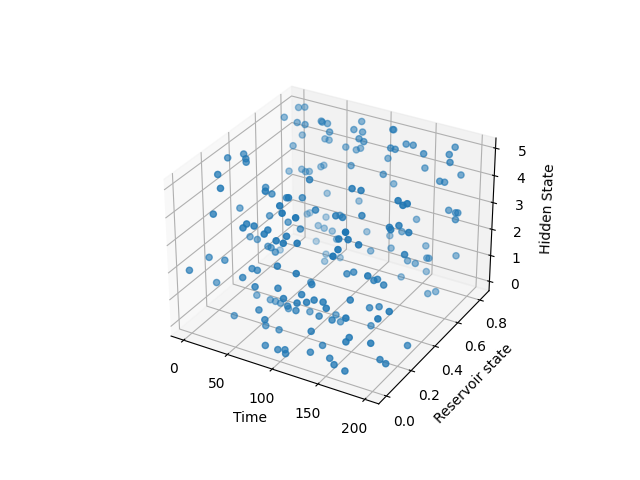

In [22]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_ordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z)#,c=sigma_ordered)

plt.show()

Plotting hidden states out of order

In [12]:
unordered = {
    "A" : 3,
    "B" : 4,
    "C" : 1,
    "D" : 0,
    "E" : 5,
    "F" : 2
}

sigma_unordered = [unordered[i] for i in sigma]

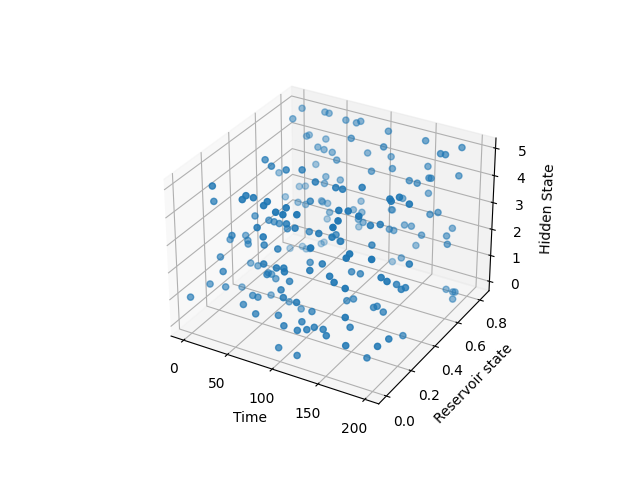

In [21]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_unordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z) #,c=sigma_ordered)

plt.show()

Plotting with hidden state as color

In [14]:
colors = {
    "A" : 'b',
    "B" : 'g',
    "C" : 'r',
    "D" : 'c',
    "E" : 'm',
    "F" : 'y'
}

sigma_colors = [colors[i] for i in sigma]

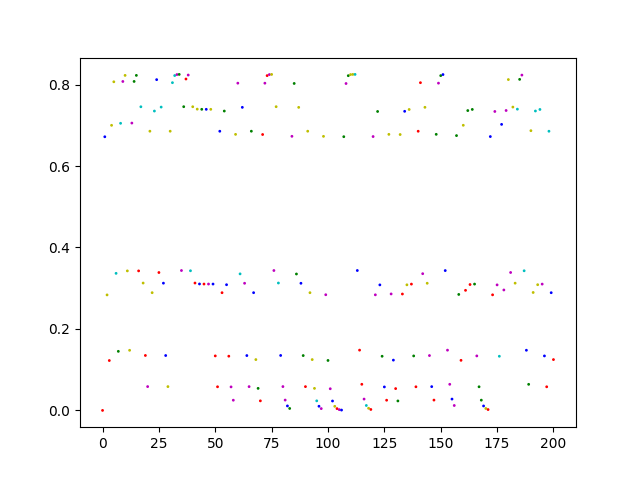

In [15]:
fig = plt.figure()
plt.scatter(range(len(h)), h, s=1, c=sigma_colors)
plt.show()

Colored by input

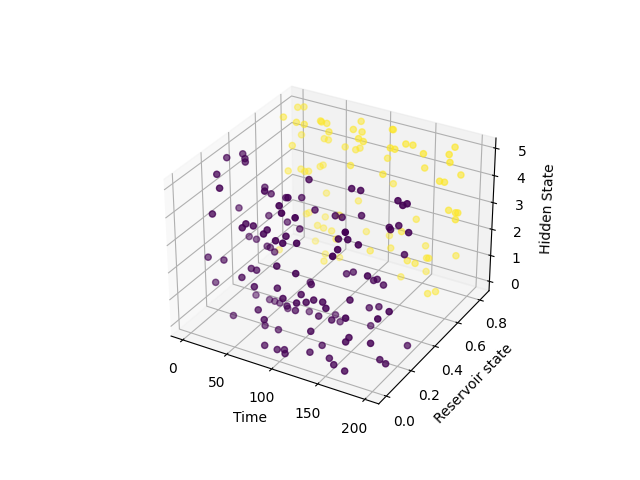

In [16]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))[1:]
y = h[1:]
z = sigma_ordered[1:]

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z, c=x)

plt.show()

colored by state

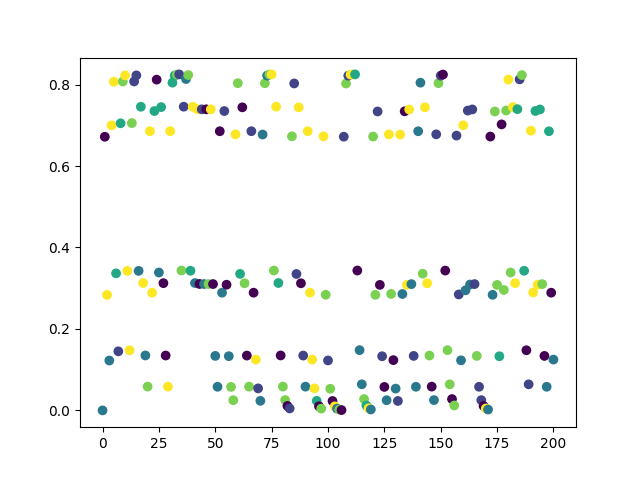

In [17]:
fig = plt.figure()
plt.scatter(range(len(h)), h, c=sigma_ordered)